In [1]:
import pandas  as pd

DTR = pd.read_excel('DowntimeResultsEDIT.xlsx')
DTR

,Location,DT_ID,AssetName,StartTime,EndTime,Reason_Duration,Reason_Comments,Reason_ActionTaken
0,Bhatkheda,587413,UUP17,2020-03-05 11:11:36,2020-03-05 12:55:59,104.23,Preventive Maintenance\n,WTG Stopped for USS Yearly Preventive Maintena...
1,Bhatkheda,587420,DJE32,2020-03-05 15:29:43,2020-03-05 15:31:41,1.58,Offset of the tower-vibration sensor in drivet...,WTG Restoration Work In Progress\n
2,Bhatkheda,587421,DJE32,2020-03-05 17:00:02,2020-03-05 23:59:59,419.57,Offset of the tower-vibration sensor in drivet...,Checked & found Generator slip ring drum failu...
3,Bhatkheda,587412,UUP16,2020-03-05 13:05:41,2020-03-05 15:15:48,130.70,Preventive Maintenance\n,WTG Stopped for USS Yearly Preventive Maintena...
4,Bhatkheda,587539,DJE09,2020-03-07 10:01:46,2020-03-07 10:03:38,1.52,SLC: Tower vibration switch tripped.\n,reset and restored WTG\n
...,...,...,...,...,...,...,...,...
105540,Periyapatti,48779,UPK52,2020-01-21 14:22:31,2020-01-21 16:41:23,138.52,Pause over RCS 14\n,Blade inspection work\n
105541,Periyapatti,48785,UPK436,2020-01-21 10:20:23,2020-01-21 16:49:24,389.10,Pause over RCS 13\n,Feeder LC for line maintenance work\n
105542,Periyapatti,49520,UNN195,2020-02-12 06:29:00,2020-02-12 12:21:21,352.21,Pause over RCS 14\n,Generator alignment work\n
105543,Periyapatti,49522,UNP89,2020-02-12 10:32:25,2020-02-12 18:02:18,449.53,Pause over RCS 14\n,Service pending work\n


# The data frame has empty rows so we remove them

In [2]:
# Select specific columns from the DataFrame
dtr = DTR[['Location', 'StartTime', 'EndTime', 'Reason_Duration', 'Reason_Comments', 'Reason_ActionTaken']]

# Convert 'Reason_Duration' from minutes to seconds and then to string
dtr.loc[:, 'Reason_Duration'] = dtr['Reason_Duration'].apply(lambda x: str(int(x * 60)) if pd.notnull(x) else None)

# Drop rows with missing values in 'Reason_Comments' column
dtr = dtr.dropna(subset=['Reason_Comments'])

# Drop rows where 'Reason_Comments' column has value 0
dtr = dtr[dtr['Reason_Comments'] != 0]

# MY DATA FRAME

In [3]:
dtr  

,Location,StartTime,EndTime,Reason_Duration,Reason_Comments,Reason_ActionTaken
0,Bhatkheda,2020-03-05 11:11:36,2020-03-05 12:55:59,6253,Preventive Maintenance\n,WTG Stopped for USS Yearly Preventive Maintena...
1,Bhatkheda,2020-03-05 15:29:43,2020-03-05 15:31:41,94,Offset of the tower-vibration sensor in drivet...,WTG Restoration Work In Progress\n
2,Bhatkheda,2020-03-05 17:00:02,2020-03-05 23:59:59,25174,Offset of the tower-vibration sensor in drivet...,Checked & found Generator slip ring drum failu...
3,Bhatkheda,2020-03-05 13:05:41,2020-03-05 15:15:48,7841,Preventive Maintenance\n,WTG Stopped for USS Yearly Preventive Maintena...
4,Bhatkheda,2020-03-07 10:01:46,2020-03-07 10:03:38,91,SLC: Tower vibration switch tripped.\n,reset and restored WTG\n
...,...,...,...,...,...,...
105540,Periyapatti,2020-01-21 14:22:31,2020-01-21 16:41:23,8311,Pause over RCS 14\n,Blade inspection work\n
105541,Periyapatti,2020-01-21 10:20:23,2020-01-21 16:49:24,23346,Pause over RCS 13\n,Feeder LC for line maintenance work\n
105542,Periyapatti,2020-02-12 06:29:00,2020-02-12 12:21:21,21132,Pause over RCS 14\n,Generator alignment work\n
105543,Periyapatti,2020-02-12 10:32:25,2020-02-12 18:02:18,26971,Pause over RCS 14\n,Service pending work\n


In [4]:
dtr['Location'].unique()

array(['Bhatkheda', 'Bothe', 'Periyapatti'], dtype=object)

# VISUAL

In [5]:
dtr_BH = dtr[dtr['Location'] == 'Bhatkheda']
dtr_BO = dtr[dtr['Location'] == 'Bothe']
dtr_PR = dtr[dtr['Location'] == 'Periyapatti']

C:\Users\M O K I\AppData\Local\Temp\ipykernel_13784\1878714505.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[:, 'Date'] = dataframe['StartTime'].dt.date  # Extract date using .loc
C:\Users\M O K I\AppData\Local\Temp\ipykernel_13784\1878714505.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[:, 'Date'] = dataframe['StartTime'].dt.date  # Extract date using .loc
C:\Users\M O K I\AppData\Local\Temp\ipykernel_13784\1878714505.py:30: SettingWithCopyWarning: 
A value is tryi

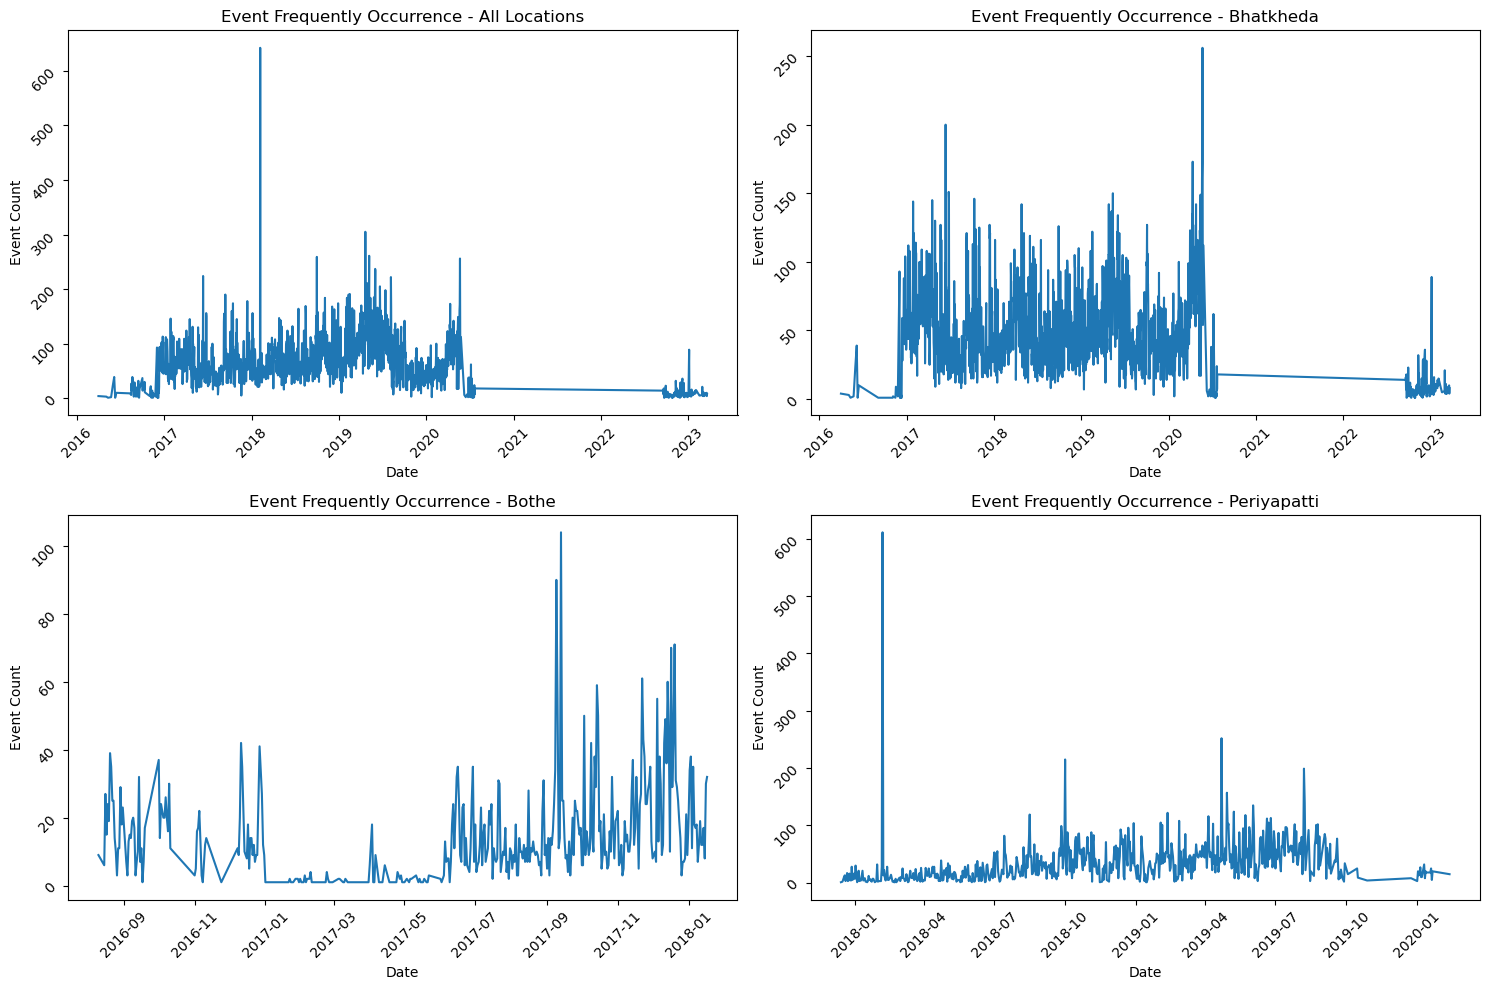

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'StartTime' to datetime for the main DataFrame dtr
dtr['StartTime'] = pd.to_datetime(dtr['StartTime'])

# Extract date from 'StartTime'
dtr['Date'] = dtr['StartTime'].dt.date

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot for main DataFrame dtr
event_freq_count = dtr.groupby('Date').size().reset_index(name='Event Count')
axes[0, 0].plot(event_freq_count['Date'], event_freq_count['Event Count'])
axes[0, 0].set_title('Event Frequently Occurrence - All Locations')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Event Count')
axes[0, 0].tick_params(rotation=45)

# Define other locations and their corresponding DataFrames
locations = ['AllTogether', 'Bhatkheda', 'Bothe', 'Periyapatti']
dataframes = [dtr, dtr_BH, dtr_BO, dtr_PR]  # Replace with your actual DataFrames

# Plot for other locations
for i, (location, dataframe) in enumerate(zip(locations[1:], dataframes[1:])):  # Skip the first entry
    row = (i + 1) // 2
    col = (i + 1) % 2
    dataframe.loc[:, 'StartTime'] = pd.to_datetime(dataframe['StartTime'])
    dataframe.loc[:, 'Date'] = dataframe['StartTime'].dt.date  # Extract date using .loc
    event_freq_count = dataframe.groupby('Date').size().reset_index(name='Event Count')
    axes[row, col].plot(event_freq_count['Date'], event_freq_count['Event Count'])
    axes[row, col].set_title(f'Event Frequently Occurrence - {location}')
    axes[row, col].set_xlabel('Date')
    axes[row, col].set_ylabel('Event Count')
    axes[row, col].tick_params(rotation=45)
    
# Adjust layout
plt.tight_layout()
plt.show()


# taking uniques in each location and using them

In [7]:
BH_df = dtr_BH[['Date', 'Location', 'Reason_Duration', 'Reason_Comments', 'Reason_ActionTaken']]
# Import the Pandas library
import pandas as pd
# Group by unique values in the "Reason_Comments" column and aggregate the other columns
GDF_BH = BH_df.groupby('Reason_Comments').agg({
    'Date': 'first',
    'Reason_Duration': 'first',
    'Reason_ActionTaken': 'first'
}).reset_index()

# Convert the "Date" column to datetime format
GDF_BH['Date'] = pd.to_datetime(GDF_BH['Date'])

# Sort the DataFrame by the "Date" column
GDF_BH = GDF_BH.sort_values(by='Date')

# Display the sorted DataFrame
                                # " GDF_BH "


BO_df = dtr_BO[['Date', 'Location', 'Reason_Duration', 'Reason_Comments', 'Reason_ActionTaken']]
# Import the Pandas library
import pandas as pd
# Group by unique values in the "Reason_Comments" column and aggregate the other columns
GDF_BO = BO_df.groupby('Reason_Comments').agg({
    'Date': 'first',
    'Reason_Duration': 'first',
    'Reason_ActionTaken': 'first'
}).reset_index()

# Convert the "Date" column to datetime format
GDF_BO['Date'] = pd.to_datetime(GDF_BO['Date'])

# Sort the DataFrame by the "Date" column
GDF_BO = GDF_BO.sort_values(by='Date')

# Display the sorted DataFrame
                                # " GDF_BO "


PR_df = dtr_PR[['Date', 'Location', 'Reason_Duration', 'Reason_Comments', 'Reason_ActionTaken']]
# Import the Pandas library
import pandas as pd
# Group by unique values in the "Reason_Comments" column and aggregate the other columns
GDF_PR = PR_df.groupby('Reason_Comments').agg({
    'Date': 'first',
    'Reason_Duration': 'first',
    'Reason_ActionTaken': 'first'
}).reset_index()

# Convert the "Date" column to datetime format
GDF_PR['Date'] = pd.to_datetime(GDF_PR['Date'])

# Sort the DataFrame by the "Date" column
GDF_PR = GDF_PR.sort_values(by='Date')

# Display the sorted DataFrame
                                # " GDF_PR "

In [8]:
''' 
Take the count of the unique values in each LOCATION from  {dtr_BH, dtr_BO, dtr_PR} these data frames and take the top 50 events with high 
DURATION and make it as a VISUALIZATION 

'''

' \nTake the count of the unique values in each LOCATION from  {dtr_BH, dtr_BO, dtr_PR} these data frames and take the top 50 events with high \nDURATION and make it as a VISUALIZATION \n\n'

# FOR BHAT KHEDA

In [9]:
BH = dtr_BH[['Date','Location', 'Reason_Duration', 'Reason_Comments']]
BH

,Date,Location,Reason_Duration,Reason_Comments
0,2020-03-05,Bhatkheda,6253,Preventive Maintenance\n
1,2020-03-05,Bhatkheda,94,Offset of the tower-vibration sensor in drivet...
2,2020-03-05,Bhatkheda,25174,Offset of the tower-vibration sensor in drivet...
3,2020-03-05,Bhatkheda,7841,Preventive Maintenance\n
4,2020-03-07,Bhatkheda,91,SLC: Tower vibration switch tripped.\n
...,...,...,...,...
67054,2022-09-19,Bhatkheda,15321,Anemometer 1 measurement error.\n
67055,2022-09-19,Bhatkheda,13290,Scada disconnected
67056,2022-09-19,Bhatkheda,13290,Scada disconnected
67057,2022-09-19,Bhatkheda,13290,Scada disconnected


In [10]:
'''
import pandas as pd

# Get the top 30 reasons from the dataframe BH
DTR_BH = BH.sort_values(by='Reason_Duration', ascending=False).head(30) # we sort by duration to avoid the top 30 downtime results.

# Filter DTR_BH to get only the rows where Reason_Comments match with BH
matching_reasons = DTR_BH[DTR_BH['Reason_Comments'].isin(BH['Reason_Comments'])]

# Get unique values and their value counts
unique_values_matching_BH = matching_reasons['Reason_Comments'].value_counts()

print("\nUnique values from 'Reason_Comments' column of DataFrame 'DTR_BH' that are also present in DataFrame 'BH':")
print(unique_values_matching_BH)

# Print both the unique values and their counts
print("\nUnique values and their counts from 'Reason_Comments' column of DataFrame 'DTR_BH' that are also present in DataFrame 'BH':")
for value, count in unique_values_matching_BH.items():
    print(f"{value}: {count}")
'''

'\nimport pandas as pd\n\n# Get the top 30 reasons from the dataframe BH\nDTR_BH = BH.sort_values(by=\'Reason_Duration\', ascending=False).head(30) # we sort by duration to avoid the top 30 downtime results.\n\n# Filter DTR_BH to get only the rows where Reason_Comments match with BH\nmatching_reasons = DTR_BH[DTR_BH[\'Reason_Comments\'].isin(BH[\'Reason_Comments\'])]\n\n# Get unique values and their value counts\nunique_values_matching_BH = matching_reasons[\'Reason_Comments\'].value_counts()\n\nprint("\nUnique values from \'Reason_Comments\' column of DataFrame \'DTR_BH\' that are also present in DataFrame \'BH\':")\nprint(unique_values_matching_BH)\n\n# Print both the unique values and their counts\nprint("\nUnique values and their counts from \'Reason_Comments\' column of DataFrame \'DTR_BH\' that are also present in DataFrame \'BH\':")\nfor value, count in unique_values_matching_BH.items():\n    print(f"{value}: {count}")\n'

# FOR DASH

In [11]:
# BHAT KHEDA dtr_BH

In [12]:
import pandas as pd

# Assuming dtr_BH is your DataFrame
dtr_BH['Date'] = pd.to_datetime(dtr_BH['Date'])  # Convert 'Date' column to datetime if not already in datetime format

# Sort the entire DataFrame by the 'Date' column in ascending order
BH_sort = dtr_BH.sort_values(by='Date').reset_index(drop=True)

# Print the sorted DataFrame
BH_sort = BH_sort[['Location', 'Date', 'Reason_Duration', 'Reason_Comments', 'Reason_ActionTaken']]

# Categorize into different time periods
'''
BH16_17 = BH_sort[(BH_sort['Date'].dt.year >= 2016) & (BH_sort['Date'].dt.year <= 2017)]
BH18_19 = BH_sort[(BH_sort['Date'].dt.year >= 2018) & (BH_sort['Date'].dt.year <= 2019)]
BH20_21 = BH_sort[(BH_sort['Date'].dt.year >= 2020) & (BH_sort['Date'].dt.year <= 2021)]
BH22_23 = BH_sort[(BH_sort['Date'].dt.year >= 2022) & (BH_sort['Date'].dt.year <= 2023)]
'''
BH16 = BH_sort[BH_sort['Date'].dt.year == 2016]
BH17 = BH_sort[BH_sort['Date'].dt.year == 2017]
BH18 = BH_sort[BH_sort['Date'].dt.year == 2018]
BH19 = BH_sort[BH_sort['Date'].dt.year == 2019]
BH20 = BH_sort[BH_sort['Date'].dt.year == 2020]
BH21 = BH_sort[BH_sort['Date'].dt.year == 2021]
BH22 = BH_sort[BH_sort['Date'].dt.year == 2022]
BH23 = BH_sort[BH_sort['Date'].dt.year == 2023]

# Concatenate categorized DataFrames into a single DataFrame
DTR_bh_sor = pd.concat([BH16,BH17,BH18,BH19,BH20,BH21,BH22,BH23])


C:\Users\M O K I\AppData\Local\Temp\ipykernel_13784\2220000927.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtr_BH['Date'] = pd.to_datetime(dtr_BH['Date'])  # Convert 'Date' column to datetime if not already in datetime format


In [13]:
'''
import dash
from dash import dcc, html, Input, Output
import pandas as pd

# Load the data
# Assuming DTR_bh_sor is your dataset
# Replace 'your_data.csv' with the path to your dataset
data = DTR_bh_sor
# Convert the 'Date' column to string
data['Date'] = data['Date'].astype(str)

# Initialize the app
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div([
    html.H1('Predictive Maintenance for Asset Management on Renewable Resources', style={'textAlign': 'center'}),
    
    # Year and Location Selection Section
    html.Div([
        html.Div([
            dcc.Dropdown(
                id='year-dropdown',
                options=[{'label': str(y), 'value': y} for y in range(2016, 2024)],
                value=2016,
                placeholder="Select a Year",
                style={'width': '50%'}
            ),
            html.Div(id='year-display', style={'margin-top': '10px'})
        ], style={'width': '50%', 'display': 'inline-block'}),
        
        html.Div([
            dcc.Dropdown(
                id='location-dropdown',
                options=[{'label': location, 'value': location} for location in data['Location'].unique()],
                value='Bhatkheda',
                placeholder="Select a Location",
                style={'width': '50%'}
            )
        ], style={'width': '50%', 'display': 'inline-block'})
    ]),
    
    # Reason Comments Graph
    html.Div([
        dcc.Graph(id='reason-comments-graph')
    ])
])

# Define the callbacks
@app.callback(
    Output('year-display', 'children'),
    [Input('year-dropdown', 'value')]
)
def update_year_display(selected_year):
    return f"Selected Year: {selected_year}"

@app.callback(
    Output('reason-comments-graph', 'figure'),
    [Input('location-dropdown', 'value'),
     Input('year-dropdown', 'value')]
)
def update_reason_comments_graph(selected_location, selected_year):
    filtered_data = data[(data['Location'] == selected_location) & (data['Date'].str.contains(str(selected_year)))]
    return {
        'data': [
            {'x': filtered_data['Reason_Comments'], 'y': filtered_data['Reason_Duration'], 'type': 'bar', 'name': 'Reason Duration'}
        ],
        'layout': {
            'title': f'Reason Comments for {selected_location} in {selected_year}',
            'xaxis': {'title': 'Reason Comments', 'tickangle': -45, 'tickfont': {'size': 10}},
            'yaxis': {'title': 'Duration'},
            'barmode': 'group'
        }
    }

if __name__ == '__main__':
    app.run_server(debug=True, port=8021) 

'''

'\nimport dash\nfrom dash import dcc, html, Input, Output\nimport pandas as pd\n\n# Load the data\n# Assuming DTR_bh_sor is your dataset\n# Replace \'your_data.csv\' with the path to your dataset\ndata = DTR_bh_sor\n# Convert the \'Date\' column to string\ndata[\'Date\'] = data[\'Date\'].astype(str)\n\n# Initialize the app\napp = dash.Dash(__name__)\n\n# Define the layout\napp.layout = html.Div([\n    html.H1(\'Predictive Maintenance for Asset Management on Renewable Resources\', style={\'textAlign\': \'center\'}),\n    \n    # Year and Location Selection Section\n    html.Div([\n        html.Div([\n            dcc.Dropdown(\n                id=\'year-dropdown\',\n                options=[{\'label\': str(y), \'value\': y} for y in range(2016, 2024)],\n                value=2016,\n                placeholder="Select a Year",\n                style={\'width\': \'50%\'}\n            ),\n            html.Div(id=\'year-display\', style={\'margin-top\': \'10px\'})\n        ], style={\'width\

In [14]:
# BOTHE  dtr_BO

In [15]:
import pandas as pd

# Convert the 'Date' column to datetime if it's not already in datetime format
dtr_BO['Date'] = pd.to_datetime(dtr_BO['Date'])

# Sort the entire DataFrame by the 'Date' column in ascending order
BO_sort = dtr_BO.sort_values(by='Date').reset_index(drop=True)

# Filter the DataFrame for each year
BH16 = BO_sort[BO_sort['Date'].dt.year == 2016]
BH17 = BO_sort[BO_sort['Date'].dt.year == 2017]
BH18 = BO_sort[BO_sort['Date'].dt.year == 2018]

DTR_bo_sor = pd.concat([BH16,BH17,BH18])

C:\Users\M O K I\AppData\Local\Temp\ipykernel_13784\3538021172.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtr_BO['Date'] = pd.to_datetime(dtr_BO['Date'])


In [16]:
'''
import dash
from dash import dcc, html, Input, Output
import pandas as pd

# Load the data
# Assuming DTR_bh_sor is your dataset
# Replace 'your_data.csv' with the path to your dataset
data = DTR_bo_sor  # Load your dataset here
# Convert the 'Date' column to string
data['Date'] = data['Date'].astype(str)

# Initialize the app
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div([
    html.H1('Predictive Maintenance for Asset Management on Renewable Resources', style={'textAlign': 'center'}),
    
    # Year and Location Selection Section
    html.Div([
        html.Div([
            dcc.Dropdown(
                id='year-dropdown',
                options=[{'label': str(y), 'value': y} for y in range(2016, 2019)],
                value=2016,
                placeholder="Select a Year",
                style={'width': '50%'}
            ),
            html.Div(id='year-display', style={'margin-top': '10px'})
        ], style={'width': '50%', 'display': 'inline-block'}),
        
        html.Div([
            dcc.Dropdown(
                id='location-dropdown',
                options=[{'label': location, 'value': location} for location in data['Location'].unique()],
                value='Bhatkheda',
                placeholder="Select a Location",
                style={'width': '50%'}
            )
        ], style={'width': '50%', 'display': 'inline-block'})
    ]),
    
    # Reason Comments Graph
    html.Div([
        dcc.Graph(id='reason-comments-graph')
    ])
])

# Define the callbacks
@app.callback(
    Output('year-display', 'children'),
    [Input('year-dropdown', 'value')]
)
def update_year_display(selected_year):
    return f"Selected Year: {selected_year}"

@app.callback(
    Output('reason-comments-graph', 'figure'),
    [Input('location-dropdown', 'value'),
     Input('year-dropdown', 'value')]
)
def update_reason_comments_graph(selected_location, selected_year):
    filtered_data = data[(data['Location'] == selected_location) & (data['Date'].str.contains(str(selected_year)))]
    return {
        'data': [
            {'x': filtered_data['Reason_Comments'], 'y': filtered_data['Reason_Duration'], 'type': 'bar', 'name': 'Reason Duration'}
        ],
        'layout': {
            'title': f'Reason Comments for {selected_location} in {selected_year}',
            'xaxis': {'title': 'Reason Comments', 'tickangle': -45, 'tickfont': {'size': 10}},
            'yaxis': {'title': 'Duration'},
            'barmode': 'group'
        }
    }

if __name__ == '__main__':
    app.run_server(debug=True, port=8022) 


'''

'\nimport dash\nfrom dash import dcc, html, Input, Output\nimport pandas as pd\n\n# Load the data\n# Assuming DTR_bh_sor is your dataset\n# Replace \'your_data.csv\' with the path to your dataset\ndata = DTR_bo_sor  # Load your dataset here\n# Convert the \'Date\' column to string\ndata[\'Date\'] = data[\'Date\'].astype(str)\n\n# Initialize the app\napp = dash.Dash(__name__)\n\n# Define the layout\napp.layout = html.Div([\n    html.H1(\'Predictive Maintenance for Asset Management on Renewable Resources\', style={\'textAlign\': \'center\'}),\n    \n    # Year and Location Selection Section\n    html.Div([\n        html.Div([\n            dcc.Dropdown(\n                id=\'year-dropdown\',\n                options=[{\'label\': str(y), \'value\': y} for y in range(2016, 2019)],\n                value=2016,\n                placeholder="Select a Year",\n                style={\'width\': \'50%\'}\n            ),\n            html.Div(id=\'year-display\', style={\'margin-top\': \'10px\'})\n

In [17]:
# PERIYAPATTI dtr_PR

In [18]:
import pandas as pd

# Convert the 'Date' column to datetime if it's not already in datetime format
dtr_PR['Date'] = pd.to_datetime(dtr_PR['Date'])

# Sort the entire DataFrame by the 'Date' column in ascending order
PR_sort = dtr_PR.sort_values(by='Date').reset_index(drop=True)

PR17 = PR_sort[PR_sort['Date'].dt.year == 2017]
PR18 = PR_sort[PR_sort['Date'].dt.year == 2018]
PR19 = PR_sort[PR_sort['Date'].dt.year == 2019]
PR20 = PR_sort[PR_sort['Date'].dt.year == 2020]

DTR_pr_sor = pd.concat([PR17,PR18,PR19,PR20])

C:\Users\M O K I\AppData\Local\Temp\ipykernel_13784\3467876429.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtr_PR['Date'] = pd.to_datetime(dtr_PR['Date'])


In [19]:
'''
import dash
from dash import dcc, html, Input, Output
import pandas as pd

# Load the data
# Assuming DTR_bh_sor is your dataset
# Replace 'your_data.csv' with the path to your dataset
data = DTR_pr_sor  # Load your dataset here
# Convert the 'Date' column to string
data['Date'] = data['Date'].astype(str)

# Initialize the app
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div([
    html.H1('Predictive Maintenance for Asset Management on Renewable Resources', style={'textAlign': 'center'}),
    
    # Year and Location Selection Section
    html.Div([
        html.Div([
            dcc.Dropdown(
                id='year-dropdown',
                options=[{'label': str(y), 'value': y} for y in range(2017, 2020)],
                value=2016,
                placeholder="Select a Year",
                style={'width': '50%'}
            ),
            html.Div(id='year-display', style={'margin-top': '10px'})
        ], style={'width': '50%', 'display': 'inline-block'}),
        
        html.Div([
            dcc.Dropdown(
                id='location-dropdown',
                options=[{'label': location, 'value': location} for location in data['Location'].unique()],
                value='Bhatkheda',
                placeholder="Select a Location",
                style={'width': '50%'}
            )
        ], style={'width': '50%', 'display': 'inline-block'})
    ]),
    
    # Reason Comments Graph
    html.Div([
        dcc.Graph(id='reason-comments-graph')
    ])
])

# Define the callbacks
@app.callback(
    Output('year-display', 'children'),
    [Input('year-dropdown', 'value')]
)
def update_year_display(selected_year):
    return f"Selected Year: {selected_year}"

@app.callback(
    Output('reason-comments-graph', 'figure'),
    [Input('location-dropdown', 'value'),
     Input('year-dropdown', 'value')]
)
def update_reason_comments_graph(selected_location, selected_year):
    filtered_data = data[(data['Location'] == selected_location) & (data['Date'].str.contains(str(selected_year)))]
    return {
        'data': [
            {'x': filtered_data['Reason_Comments'], 'y': filtered_data['Reason_Duration'], 'type': 'bar', 'name': 'Reason Duration'}
        ],
        'layout': {
            'title': f'Reason Comments for {selected_location} in {selected_year}',
            'xaxis': {'title': 'Reason Comments', 'tickangle': -45, 'tickfont': {'size': 10}},
            'yaxis': {'title': 'Duration'},
            'barmode': 'group'
        }
    }

if __name__ == '__main__':
    app.run_server(debug=True, port=8023) 

'''

'\nimport dash\nfrom dash import dcc, html, Input, Output\nimport pandas as pd\n\n# Load the data\n# Assuming DTR_bh_sor is your dataset\n# Replace \'your_data.csv\' with the path to your dataset\ndata = DTR_pr_sor  # Load your dataset here\n# Convert the \'Date\' column to string\ndata[\'Date\'] = data[\'Date\'].astype(str)\n\n# Initialize the app\napp = dash.Dash(__name__)\n\n# Define the layout\napp.layout = html.Div([\n    html.H1(\'Predictive Maintenance for Asset Management on Renewable Resources\', style={\'textAlign\': \'center\'}),\n    \n    # Year and Location Selection Section\n    html.Div([\n        html.Div([\n            dcc.Dropdown(\n                id=\'year-dropdown\',\n                options=[{\'label\': str(y), \'value\': y} for y in range(2017, 2020)],\n                value=2016,\n                placeholder="Select a Year",\n                style={\'width\': \'50%\'}\n            ),\n            html.Div(id=\'year-display\', style={\'margin-top\': \'10px\'})\n

In [20]:
sor_DTR = pd.concat([DTR_bh_sor,DTR_bo_sor,DTR_pr_sor])

In [21]:
sor_DTR

,Location,Date,Reason_Duration,Reason_Comments,Reason_ActionTaken,StartTime,EndTime
0,Bhatkheda,2016-03-31,60,Erro/WTG Breakdowns,Test1,NaT,NaT
1,Bhatkheda,2016-03-31,120,Internal Line Shutdown,Test2,NaT,NaT
2,Bhatkheda,2016-03-31,120,Shut down,Testing2,NaT,NaT
3,Bhatkheda,2016-03-31,120,SMS trip,Testing1,NaT,NaT
4,Bhatkheda,2016-05-03,474,test1,",sdsd",NaT,NaT
...,...,...,...,...,...,...,...
21967,Periyapatti,2020-02-12,26971,Pause over RCS 14\n,Service pending work\n,2020-02-12 10:32:25,2020-02-12 18:02:18
21968,Periyapatti,2020-02-12,510,Frequency error 1: 0.56 Hz\n,Feeder 4 trip\n,2020-02-12 07:09:52,2020-02-12 07:18:43
21969,Periyapatti,2020-02-12,607,Frequency error 1: 0.56 Hz\n,Feeder 4 trip\n,2020-02-12 07:09:52,2020-02-12 07:20:05
21970,Periyapatti,2020-02-12,508,Frequency error 1: 0.56 Hz\n,Feeder 4 trip\n,2020-02-12 07:09:56,2020-02-12 07:18:43


In [22]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import openai
from openai import OpenAI
from dash.dependencies import State


openai.api_type = "open_ai"
openai.api_base = "http://localhost:1234/v1"
openai.ap = "NULL"

client = OpenAI(base_url="http://localhost:1234/v1", api_key="lm-studio")

# Load the data
# Assuming sor_DTR is your DataFrame
# Replace 'your_data.csv' with the path to your dataset
sor_DTR = sor_DTR

# Convert the 'Date' column to datetime
sor_DTR['Date'] = pd.to_datetime(sor_DTR['Date'])

# Initialize the app
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div([
    html.H1('Predictive Maintenance for Asset Management on Renewable Resources', style={'textAlign': 'center'}),
    
    # Location Selection Section
    html.Div([
        html.Div([
            dcc.Dropdown(
                id='location-dropdown',
                options=[{'label': location, 'value': location} for location in sor_DTR['Location'].unique()],
                value=sor_DTR['Location'].iloc[0],
                placeholder="Select a Location",
                style={'width': '50%'}
            )
        ], style={'width': '50%', 'display': 'inline-block'})
    ]),

    # Year Selection Section
    html.Div([
        html.Div([
            dcc.Dropdown(
                id='year-dropdown',
                value=sor_DTR['Date'].dt.year.min(),
                placeholder="Select a Year",
                style={'width': '50%'}
            ),
            html.Div(id='year-display', style={'margin-top': '10px'})
        ], style={'width': '50%', 'display': 'inline-block'})
    ]),

    # Reason Comments Graph
    html.Div([
        dcc.Graph(id='reason-comments-graph')
    ]),

    # Chatbot Section
    html.Div([
        dcc.Textarea(id='chat-input', placeholder='Enter your message...', style={'width': '100%', 'height': 100}),
        html.Button('Submit', id='chat-submit-button', n_clicks=0),
        html.Div(id='chat-output')
    ])
])

# Update year dropdown options based on selected location
@app.callback(
    Output('year-dropdown', 'options'),
    [Input('location-dropdown', 'value')]
)
def update_year_options(selected_location):
    location_data = sor_DTR[sor_DTR['Location'] == selected_location]
    years_available = location_data['Date'].dt.year.unique()
    return [{'label': str(year), 'value': year} for year in years_available]

# Define the callbacks
@app.callback(
    Output('year-display', 'children'),
    [Input('year-dropdown', 'value')]
)
def update_year_display(selected_year):
    return f"Selected Year: {selected_year}"

@app.callback(
    Output('reason-comments-graph', 'figure'),
    [Input('location-dropdown', 'value'),
     Input('year-dropdown', 'value')]
)
def update_reason_comments_graph(selected_location, selected_year):
    filtered_data = sor_DTR[(sor_DTR['Location'] == selected_location) & (sor_DTR['Date'].dt.year == selected_year)]
    return {
        'data': [
            {'x': filtered_data['Reason_Comments'], 'y': filtered_data['Reason_Duration'], 'type': 'bar', 'name': 'Reason Duration'}
        ],
        'layout': {
            'title': f'Reason Comments for {selected_location} in {selected_year}',
            'xaxis': {'title': 'Reason Comments', 'tickangle': -45, 'tickfont': {'size': 10}},
            'yaxis': {'title': 'Duration'},
            'barmode': 'group'
        }
    }

@app.callback(
    Output('chat-output', 'children'),
    [Input('chat-submit-button', 'n_clicks')],
    [State('chat-input', 'value')]
)
def update_chat_output(n_clicks, input_text):
    if n_clicks > 0:
        response = chat_with_gpt(input_text)
        return html.Div([
            html.P('User: ' + input_text),
            html.P('Chatbot: ' + response)
        ])

def chat_with_gpt(prompt):
    response = client.chat.completions.create(
        model="gpt-4-0613",
        messages=[{"role": "user", "content": prompt}]
    )

    message = response.choices[0].message.content.strip()
    
    # Check if the user is asking about Reason_Comments
    if "reason comments" in prompt.lower():
        # Extract reason comments from sor_DTR DataFrame
        reason_comments = sor_DTR['Reason_Comments'].unique()
        # Construct the response
        if len(reason_comments) > 0:
            return "Reason comments available are: " + ", ".join(reason_comments)
        else:
            return "No reason comments available."
    
    # Check if the user is asking about Reason_ActionTaken
    elif "reason actiontaken" in prompt.lower():
        # Extract reason action taken from sor_DTR DataFrame
        reason_action_taken = sor_DTR['Reason_ActionTaken'].unique()
        # Construct the response
        if len(reason_action_taken) > 0:
            return "Reasons actions taken are: " + ", ".join(reason_action_taken)
        else:
            return "No reason action taken available."
    
    # If the prompt does not match any known query
    else:
        return "I'm sorry, I couldn't understand your question. Can you please be more specific?"


if __name__ == '__main__':
    app.run_server(debug=True,port = 8035)

In [23]:
# LOADING IT TO PG ADMIN

In [24]:
sor_DTR

,Location,Date,Reason_Duration,Reason_Comments,Reason_ActionTaken,StartTime,EndTime
0,Bhatkheda,2016-03-31,60,Erro/WTG Breakdowns,Test1,NaT,NaT
1,Bhatkheda,2016-03-31,120,Internal Line Shutdown,Test2,NaT,NaT
2,Bhatkheda,2016-03-31,120,Shut down,Testing2,NaT,NaT
3,Bhatkheda,2016-03-31,120,SMS trip,Testing1,NaT,NaT
4,Bhatkheda,2016-05-03,474,test1,",sdsd",NaT,NaT
...,...,...,...,...,...,...,...
21967,Periyapatti,2020-02-12,26971,Pause over RCS 14\n,Service pending work\n,2020-02-12 10:32:25,2020-02-12 18:02:18
21968,Periyapatti,2020-02-12,510,Frequency error 1: 0.56 Hz\n,Feeder 4 trip\n,2020-02-12 07:09:52,2020-02-12 07:18:43
21969,Periyapatti,2020-02-12,607,Frequency error 1: 0.56 Hz\n,Feeder 4 trip\n,2020-02-12 07:09:52,2020-02-12 07:20:05
21970,Periyapatti,2020-02-12,508,Frequency error 1: 0.56 Hz\n,Feeder 4 trip\n,2020-02-12 07:09:56,2020-02-12 07:18:43


In [25]:
dbname = 'postgres'
user = 'postgres'
password = '8870005776'
host = 'localhost'
port = '1410'

conn_str = f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{dbname}"
engine = create_engine(conn_str)

sor_DTR=sor_DTR.to_sql('MasterThesis', engine, if_exists='replace', index=False)
sor_DTR

NameError: name 'create_engine' is not defined